In [2]:
import pandas as pd
import geopandas as gpd

In [22]:
lau = gpd.read_file('01_GIS/LAU/LAU_RG_01M_2020_3035.shp')

In [23]:
lau

,GISCO_ID,CNTR_CODE,LAU_ID,LAU_NAME,POP_2020,POP_DENS_2,AREA_KM2,YEAR,FID,geometry
0,CZ_579475,CZ,579475,Libňatov,363.0,62.240158,5.832247,2020,CZ_579475,"POLYGON ((4747705.585 3057545.260, 4746836.524..."
1,CZ_579483,CZ,579483,Libotov,178.0,41.774759,4.260946,2020,CZ_579483,"POLYGON ((4731662.418 3049054.578, 4732297.093..."
2,CZ_579491,CZ,579491,Vranov,181.0,37.408873,4.838424,2020,CZ_579491,"POLYGON ((4540137.623 2963864.496, 4538706.113..."
3,CZ_579505,CZ,579505,Malá Úpa,142.0,5.318510,26.699207,2020,CZ_579505,"POLYGON ((4730399.261 3087673.334, 4730914.253..."
4,AT_41004,AT,41004,Eggendorf im Traunkreis,1041.0,116.481747,8.937023,2020,AT_41004,"POLYGON ((4631543.792 2788412.230, 4630476.583..."
...,...,...,...,...,...,...,...,...,...,...
98608,SK_599816,SK,599816,Košice - mestská časť Nad jazerom,24443.0,6686.211551,3.655732,2020,SK_599816,"POLYGON ((5149120.507 2905279.350, 5150154.014..."
98609,SK_599824,SK,599824,Košice - mestská časť Juh,22692.0,2324.881955,9.760496,2020,SK_599824,"POLYGON ((5144451.048 2904986.166, 5144591.047..."
98610,SK_599841,SK,599841,Košice - mestská časť Šaca,5969.0,124.672777,47.877333,2020,SK_599841,"POLYGON ((5141041.890 2900350.394, 5144604.564..."
98611,SK_599859,SK,599859,Košice - mestská časť Poľov,1219.0,94.049511,12.961258,2020,SK_599859,"POLYGON ((5141041.890 2900350.394, 5141299.765..."


In [30]:
p = lau.query('CNTR_CODE == "PL"')

In [31]:
p

,GISCO_ID,CNTR_CODE,LAU_ID,LAU_NAME,POP_2020,POP_DENS_2,AREA_KM2,YEAR,FID,geometry
84441,PL_1003021030804,PL,1003021030804,Nowa Ruda,21908.0,591.407619,37.043824,2020,PL_1003021030804,"POLYGON ((4782168.918 3069978.984, 4782527.805..."
84442,PL_1003021030805,PL,1003021030805,Polanica-Zdrój,6307.0,366.236638,17.221106,2020,PL_1003021030805,"POLYGON ((4784787.427 3050209.365, 4782222.832..."
84443,PL_1003021030806,PL,1003021030806,Bystrzyca Kłodzka,18825.0,55.608920,338.524827,2020,PL_1003021030806,"POLYGON ((4808273.240 3032795.317, 4807216.392..."
84444,PL_1003021030807,PL,1003021030807,Kłodzko,17112.0,67.575006,253.229722,2020,PL_1003021030807,"POLYGON ((4785374.682 3063952.911, 4786314.626..."
84445,PL_1003021030808,PL,1003021030808,Lądek-Zdrój,8210.0,70.004105,117.278836,2020,PL_1003021030808,"POLYGON ((4807933.842 3055715.930, 4809802.765..."
...,...,...,...,...,...,...,...,...,...,...
88522,PL_1004281550502,PL,1004281550502,Ełk,11820.0,31.171963,379.186905,2020,PL_1004281550502,"POLYGON ((5142507.552 3479117.930, 5140944.402..."
88523,PL_1004281550503,PL,1004281550503,Kalinowo,6660.0,23.403884,284.568150,2020,PL_1004281550503,"POLYGON ((5138864.749 3490948.283, 5138959.918..."
88524,PL_1004281550504,PL,1004281550504,Prostki,7238.0,31.317368,231.117762,2020,PL_1004281550504,"POLYGON ((5142507.552 3479117.930, 5142642.316..."
88525,PL_1004281550505,PL,1004281550505,Stare Juchy,3733.0,18.946905,197.024267,2020,PL_1004281550505,"POLYGON ((5114510.822 3499908.473, 5115142.566..."


In [32]:
de = pd.read_excel('Poland-cleaned.xlsx')

In [38]:
p.shape

(2477, 10)

In [35]:
de.NUTS_ID.to_list()

[0,
 200000,
 201000,
 202000,
 203000,
 204000,
 205000,
 206000,
 207000,
 208000,
 209000,
 210000,
 211000,
 212000,
 213000,
 214000,
 215000,
 216000,
 217000,
 218000,
 219000,
 220000,
 221000,
 222000,
 223000,
 224000,
 225000,
 226000,
 261000,
 262000,
 264000,
 265000,
 400000,
 401000,
 402000,
 403000,
 404000,
 405000,
 406000,
 407000,
 408000,
 409000,
 410000,
 411000,
 412000,
 413000,
 414000,
 415000,
 416000,
 417000,
 418000,
 419000,
 461000,
 462000,
 463000,
 464000,
 600000,
 601000,
 602000,
 603000,
 604000,
 605000,
 606000,
 607000,
 608000,
 609000,
 610000,
 611000,
 612000,
 613000,
 614000,
 615000,
 616000,
 617000,
 618000,
 619000,
 620000,
 661000,
 662000,
 663000,
 664000,
 800000,
 801000,
 802000,
 803000,
 804000,
 805000,
 806000,
 807000,
 808000,
 809000,
 810000,
 811000,
 812000,
 861000,
 862000,
 1000000,
 1001000,
 1002000,
 1003000,
 1004000,
 1005000,
 1006000,
 1007000,
 1008000,
 1009000,
 1010000,
 1011000,
 1012000,
 1013000,
 

C:\Users\Mohamed\miniconda3\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

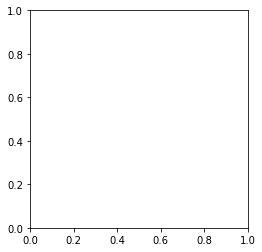

In [34]:
p[p['LAU_ID'].isin(de.NUTS_ID.to_list())].plot()